# Sales Trend Analysis

This project focuses on analyzing and visualizing sales trends to uncover patterns, detect anomalies, and provide actionable insights. The analysis leverages Python libraries such as `pandas`, `matplotlib`, and `seaborn` for data manipulation and visualization.

---

##  Project Overview

In this project, we:

- Explored and cleaned the sales dataset
- Analyzed monthly sales trends across different categories
- Detected sales anomalies over time
- Created visually appealing plots to represent trends and outliers

---

## 🔧 Tools & Technologies Used

- **Python**
- **Pandas**
- **Matplotlib**
- **Seaborn**
- **Jupyter Notebook**

---




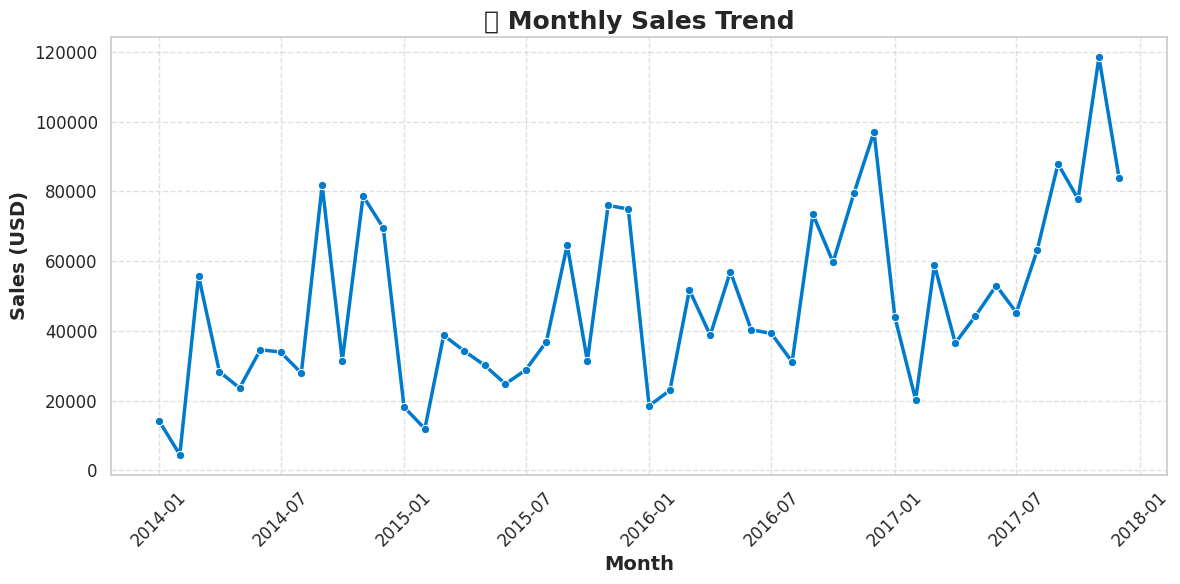

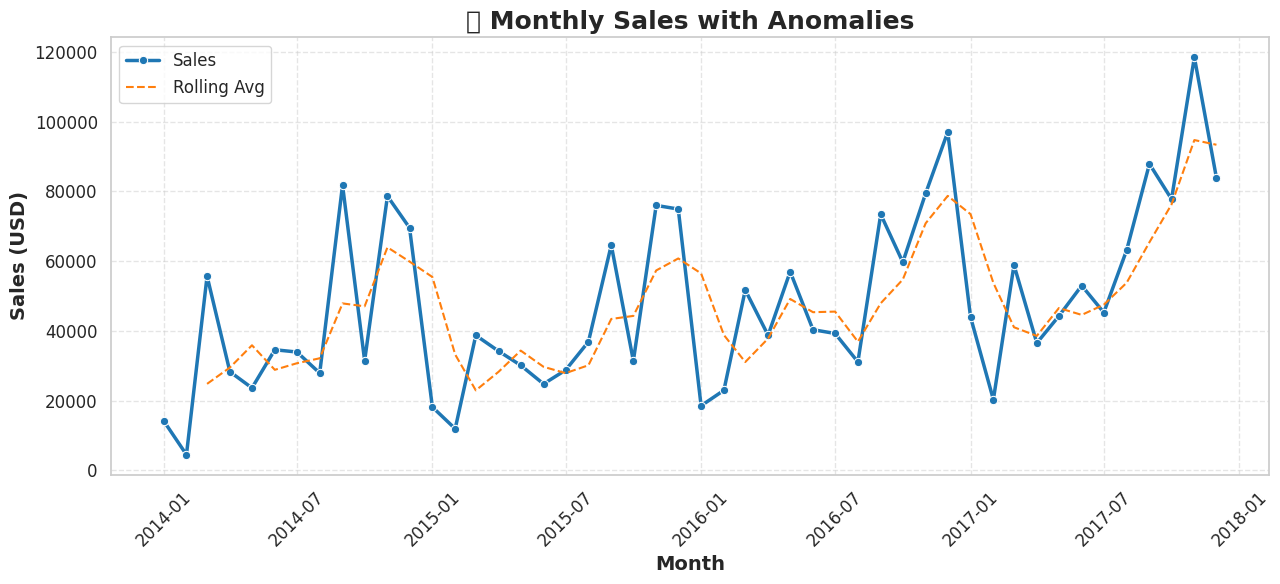

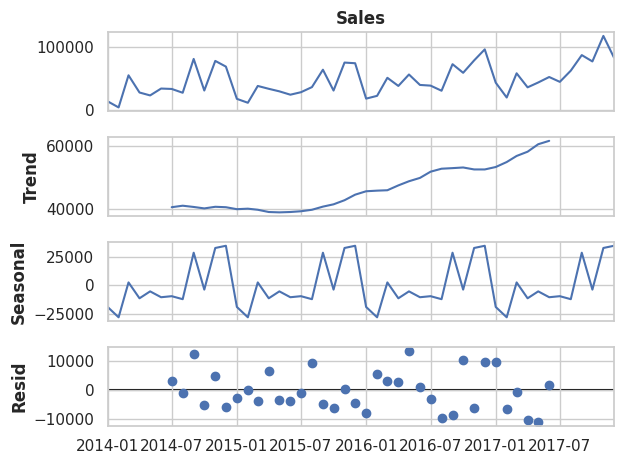

Anomalous Months:
Empty DataFrame
Columns: [Month, Sales]
Index: []


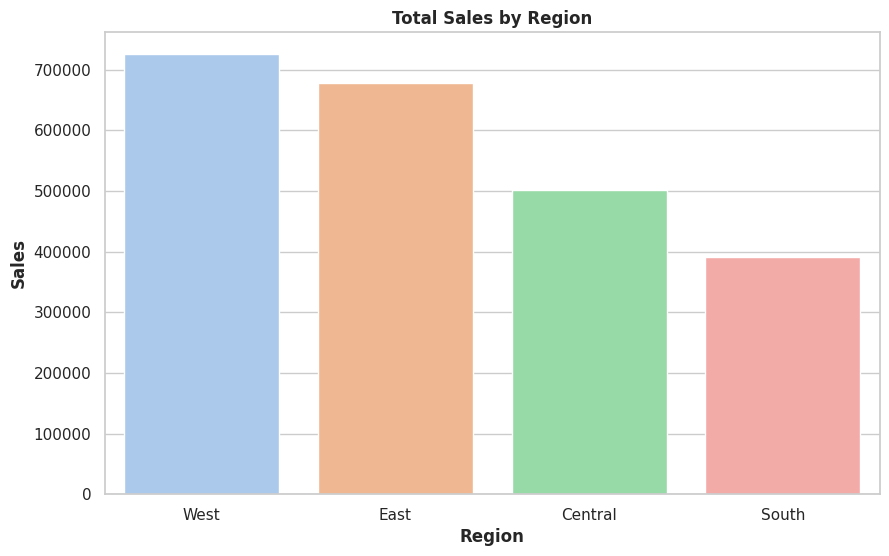

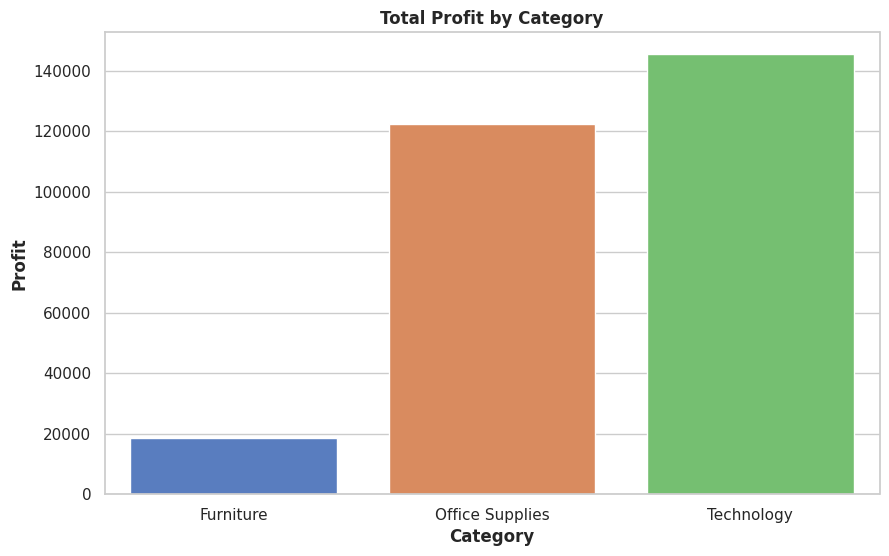

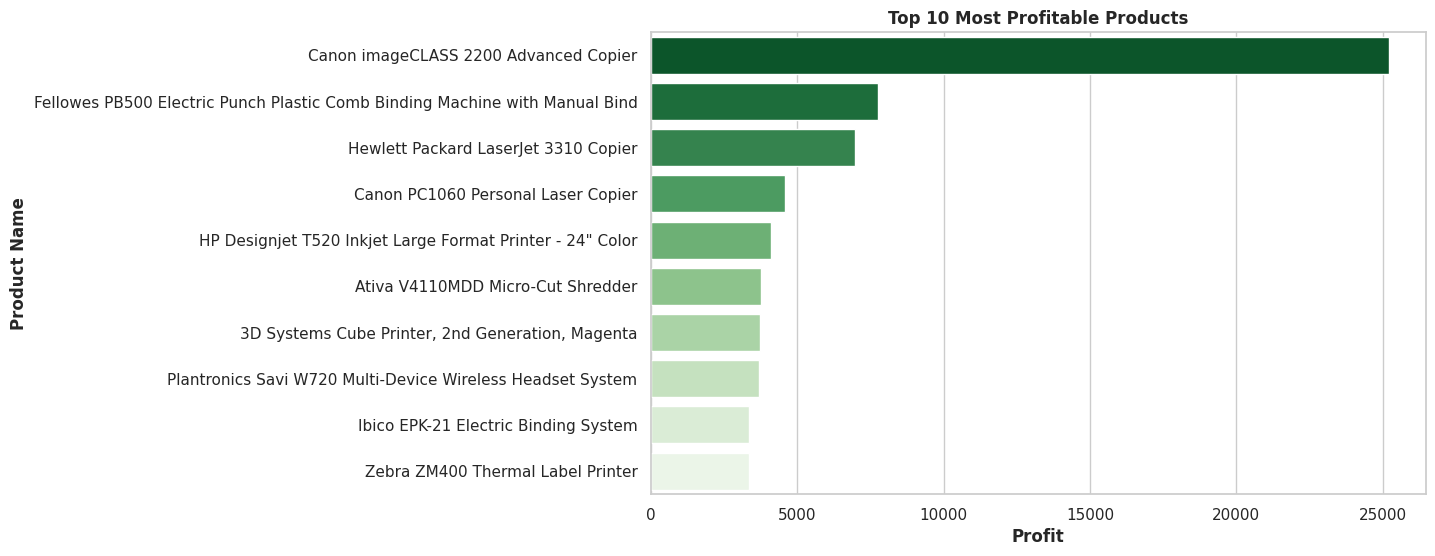

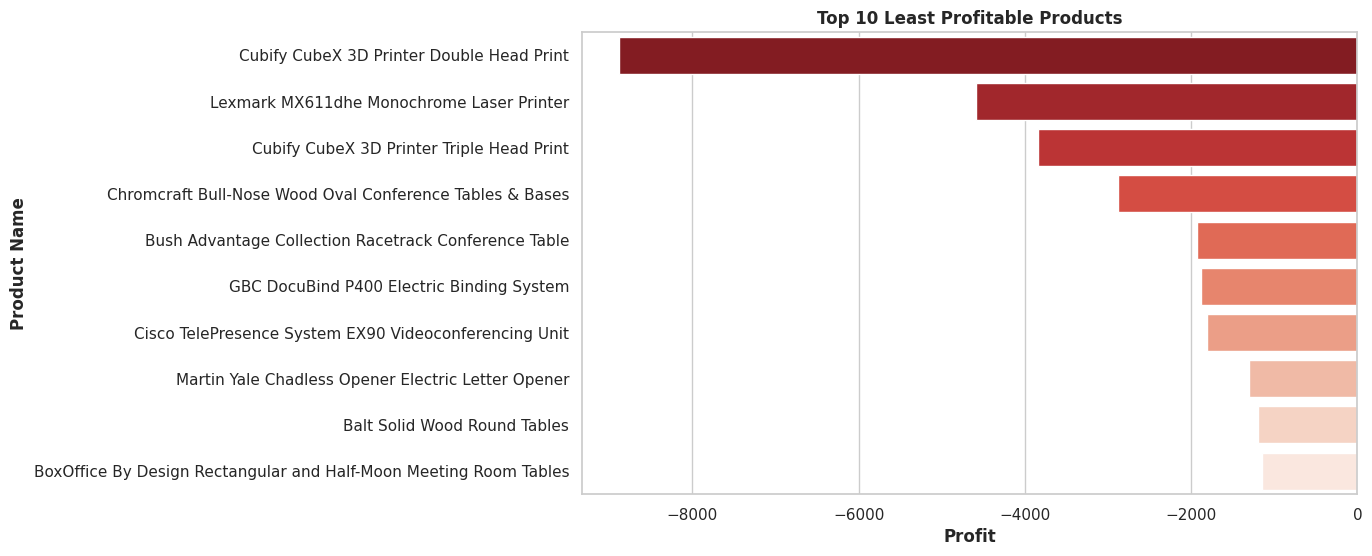

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")



sns.set(style="whitegrid")
df = pd.read_csv("/content/Sample - Superstore.csv", encoding='latin1')


df['Order Date'] = pd.to_datetime(df['Order Date'])

# Create monthly sales data
df['Month'] = df['Order Date'].dt.to_period('M')
monthly_sales = df.groupby('Month')['Sales'].sum().reset_index()
monthly_sales['Month'] = monthly_sales['Month'].dt.to_timestamp()

# Calculate rolling average and std for anomaly detection
monthly_sales['rolling_mean'] = monthly_sales['Sales'].rolling(window=3).mean()
monthly_sales['rolling_std'] = monthly_sales['Sales'].rolling(window=3).std()
monthly_sales['Anomaly'] = (
    (monthly_sales['Sales'] > monthly_sales['rolling_mean'] + 2 * monthly_sales['rolling_std']) |
    (monthly_sales['Sales'] < monthly_sales['rolling_mean'] - 2 * monthly_sales['rolling_std'])
)

# Set global styles
sns.set_theme(style="whitegrid")
plt.rcParams.update({'axes.titlesize': 18,
                     'axes.labelsize': 14,
                     'xtick.labelsize': 12,
                     'ytick.labelsize': 12,
                     'axes.titleweight': 'bold',
                     'axes.labelweight': 'bold'})

# 1. Monthly Sales Trend
plt.figure(figsize=(12, 6))
sns.set_theme(style="whitegrid")

# Line plot with markers
sns.lineplot(data=monthly_sales, x='Month', y='Sales', marker='o', linewidth=2.5, color='#007ACC')

# Bold titles and labels
plt.title("📈 Monthly Sales Trend", fontsize=18, fontweight='bold')
plt.xlabel("Month", fontsize=14, fontweight='bold')
plt.ylabel("Sales (USD)", fontsize=14, fontweight='bold')

# Customize ticks
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Grid and layout
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 2. Anomalies on Monthly Sales
plt.figure(figsize=(13, 6))
sns.set_style("whitegrid")

# Line and rolling average
sns.lineplot(data=monthly_sales, x='Month', y='Sales', label='Sales', color='#1f77b4', linewidth=2.5, marker='o')
sns.lineplot(data=monthly_sales, x='Month', y='rolling_mean', label='Rolling Avg', color='#ff7f0e', linestyle='--')

# Anomaly dots
sns.scatterplot(data=monthly_sales[monthly_sales['Anomaly']], x='Month', y='Sales',
                color='red', s=120, label='Anomaly', marker='D', edgecolor='black')

# Titles and axes
plt.title("🚨 Monthly Sales with Anomalies", fontsize=18, fontweight='bold')
plt.xlabel("Month", fontsize=14, fontweight='bold')
plt.ylabel("Sales (USD)", fontsize=14, fontweight='bold')
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

plt.legend(fontsize=12)
plt.tight_layout()
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()


# 3. Time Series Decomposition
monthly_sales.set_index('Month', inplace=True)
decomp = seasonal_decompose(monthly_sales['Sales'], model='additive')
decomp.plot()
plt.tight_layout()
plt.show()
monthly_sales.reset_index(inplace=True)

# 4. Highlighting Anomalous Months
anomalies = monthly_sales[monthly_sales['Anomaly']]
print("Anomalous Months:")
print(anomalies[['Month', 'Sales']])

#5 Sales by region
plt.figure(figsize=(10, 6))
region_sales = df.groupby('Region')['Sales'].sum().sort_values(ascending=False)
sns.barplot(x=region_sales.index, y=region_sales.values, palette='pastel')
plt.title("Total Sales by Region")
plt.ylabel("Sales")
plt.show()

#6 Sales by category
plt.figure(figsize=(10, 6))
cat_profit = df.groupby('Category')['Profit'].sum().sort_values()
sns.barplot(x=cat_profit.index, y=cat_profit.values, palette='muted')
plt.title("Total Profit by Category")
plt.ylabel("Profit")
plt.show()
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).head(10)
bottom_products = df.groupby('Product Name')['Profit'].sum().sort_values().head(10)
#7 Top products by profit
plt.figure(figsize=(10, 6))
sns.barplot(x=top_products.values, y=top_products.index, palette='Greens_r')
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Profit")
plt.show()

#8 Bottom products by profit
plt.figure(figsize=(10, 6))
sns.barplot(x=bottom_products.values, y=bottom_products.index, palette='Reds_r')
plt.title("Top 10 Least Profitable Products")
plt.xlabel("Profit")
plt.show()







